# Adult Dataset

This notebook contains an analysis of the popular adult dataset found in the UCI Machine Learning Repository. This is a classification task where the goal is to predict whether a person makes less than or greater than (or equal to) \$50,000 in annual income.

In [1]:
import urllib.request

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
desc = urllib.request.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names").read(20000).decode('utf=8')
print(desc)

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

## Data Preprocessing

We get our raw data then standardize continuous variables and dummy code categorical variables.

In [3]:
headers = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education-Num', 'Marial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Native Country', 'Income']

In [4]:
raw_train_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = headers)

In [5]:
raw_train_df.head()

,Age,Work Class,Final Weight,Education,Education-Num,Marial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
raw_test_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names = headers, header=0)

In [7]:
raw_test_df.head()

,Age,Work Class,Final Weight,Education,Education-Num,Marial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Work Class        32561 non-null object
Final Weight      32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Marial Status     32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Native Country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Work Class        16281 non-null object
Final Weight      16281 non-null int64
Education         16281 non-null object
Education-Num     16281 non-null int64
Marial Status     16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours per week    16281 non-null int64
Native Country    16281 non-null object
Income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


No missing data. We can now dummy-code categorical and scale continuous variables.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_columns = list(raw_train_df.select_dtypes(include=['int64']).columns)
train_df = raw_train_df
train_df[continuous_columns] = scaler.fit_transform(raw_train_df[continuous_columns])
test_df = raw_test_df
test_df[continuous_columns] = scaler.transform(raw_test_df[continuous_columns])

In [11]:
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [12]:
train_df.columns.difference(test_df.columns)

Index(['Income_ >50K', 'Native Country_ Holand-Netherlands'], dtype='object')

In [13]:
test_df['Native Country_ Holand-Netherlands'] = 0

In [25]:
train_df.head()

,Age,Final Weight,Education-Num,Capital Gain,Capital Loss,Hours per week,Work Class_ Federal-gov,Work Class_ Local-gov,Work Class_ Never-worked,Work Class_ Private,...,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia,Income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test_df.head()

,Age,Final Weight,Education-Num,Capital Gain,Capital Loss,Hours per week,Work Class_ Federal-gov,Work Class_ Local-gov,Work Class_ Never-worked,Work Class_ Private,...,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia,Income_ >50K.,Native Country_ Holand-Netherlands
0,-0.995706,0.350774,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.042642,-0.947095,-0.420060,-0.145920,-0.21666,0.774468,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.775768,1.394362,0.746039,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.397233,-0.279070,-0.031360,0.895083,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,-1.508894,-0.817458,-0.031360,-0.145920,-0.21666,-0.845327,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Now we can prepare the train and test sets:

In [27]:
X_train = train_df.drop('Income_ >50K', axis=1)
X_test = test_df.drop('Income_ >50K.', axis=1)
y_train = train_df['Income_ >50K']
y_test = test_df['Income_ >50K.']

## Feature Selection

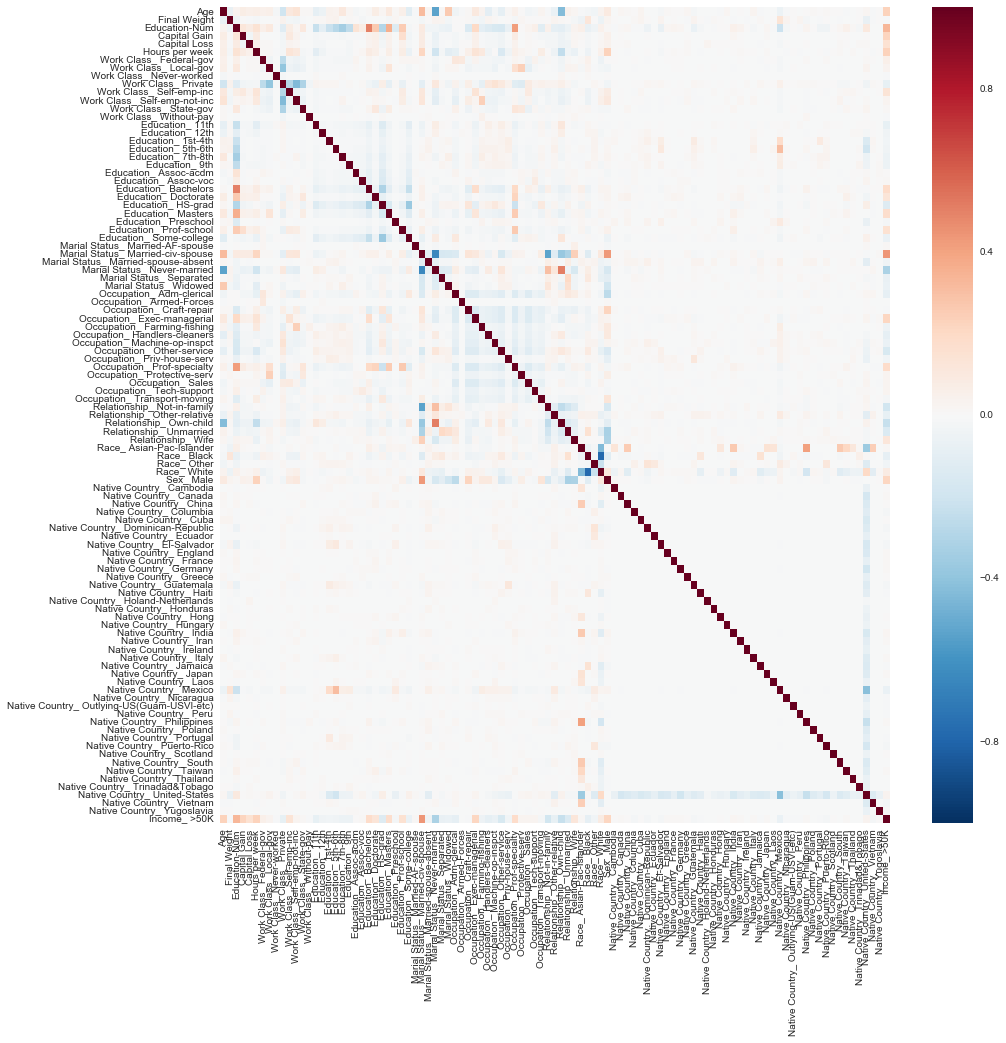

In [28]:
corrplot = plt.figure(figsize=(15,15))
corrplotax = sns.heatmap(train_df.corr())

There are a lot of features here, and while it would be possible to sift through them manually, I'll instead use a random forest for feature selection.

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200)

selector = SelectFromModel(rf)
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=None)

In [178]:
importances = selector.estimator_.feature_importances_
importance_std = np.std([tree.feature_importances_ for tree in selector.estimator_.estimators_], axis=0)
feature_order = np.argsort(importances)[::-1]

print('Average feature importance (threshold for selection):', '{:.20f}'.format(np.mean(importances)))

Average feature importance (threshold for selection): 0.01000000000000000194


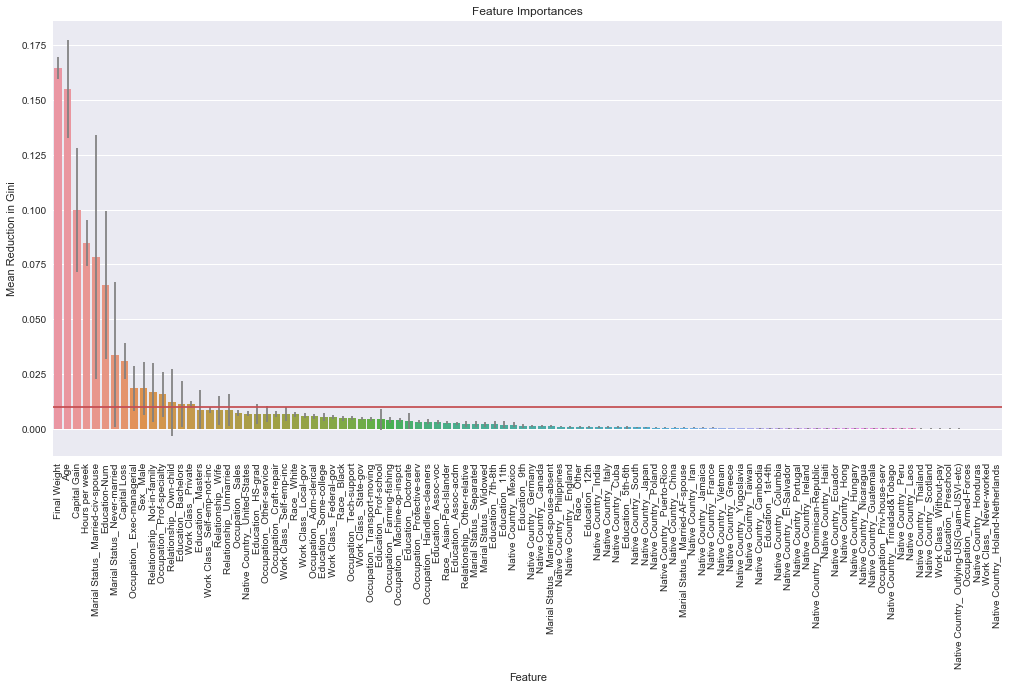

In [179]:
sns.set_color_codes()
importances_fig = plt.figure(figsize=(17,8))
importances_ax = sns.barplot(X_train.columns[feature_order], importances[feature_order])
importances_ax.errorbar(np.arange(len(importances)), importances[feature_order], yerr=importance_std[feature_order], fmt='none', color='gray')
importances_ax.plot(importances_ax.get_xlim(), [np.mean(importances), np.mean(importances)], color='r')
importances_ax.set_xlabel('Feature')
importances_ax.set_ylabel('Mean Reduction in Gini')
importances_ax.set_title('Feature Importances')
for tick in importances_ax.get_xticklabels():
    tick.set_rotation(90)

In [116]:
selected_features = X_train.columns[selector.get_support()]
selected_features

Index(['Age', 'Final Weight', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Work Class_ Private', 'Education_ Bachelors',
       'Marial Status_ Married-civ-spouse', 'Marial Status_ Never-married',
       'Occupation_ Exec-managerial', 'Occupation_ Prof-specialty',
       'Relationship_ Not-in-family', 'Relationship_ Own-child', 'Sex_ Male'],
      dtype='object')

Based on the threshold of around 0.01 (which is the mean gini importance of the given features), we've reduced our set of important features to 15 (from our original set of 100 features), a much more manageable number. We can now create new training and test sets based on these new features.

In [117]:
X_train_selected = pd.DataFrame(selector.transform(X_train), columns = selected_features)
X_test_selected = pd.DataFrame(selector.transform(X_test), columns = selected_features)

In [120]:
X_train_selected.head()

,Age,Final Weight,Education-Num,Capital Gain,Capital Loss,Hours per week,Work Class_ Private,Education_ Bachelors,Marial Status_ Married-civ-spouse,Marial Status_ Never-married,Occupation_ Exec-managerial,Occupation_ Prof-specialty,Relationship_ Not-in-family,Relationship_ Own-child,Sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Modeling


Based on the documentation, the best result generated by prior studies is an error rate of 14.05 (FSS Naive Bayes), which would be equivalent to an accuracy of 85.95. My goal will be to beat this accuracy rate.

In [121]:
rf.fit(X_train_selected, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [161]:
rf.score(X_train_selected, y_train)

0.99972359571266234

The above is an alarmingly high accuracy; our model may be overfitting on the training data. To check, let's take a look at our holdout set accuracy.

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [129]:
rf.score(X_test_selected, y_test)

0.85080768994533507

As we thought, our model seems to have overfit, but the accuracy is actually pretty good. However, while our accuracy rate is close to our target of 85.95%, it is still lower. Let's view classification metrics:

             precision    recall  f1-score   support

          0       0.89      0.92      0.90     12435
          1       0.71      0.61      0.66      3846

avg / total       0.85      0.85      0.85     16281



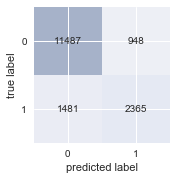

In [128]:
predictions = rf.predict(X_test_selected)
plot_confusion_matrix(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

With a recall for the 'Income >50K' class of 0.61, it is obvious that our model is too lax on declaring that one is in the negative class. Let's do a 10-fold cross validation on the training data.

In [160]:
from sklearn.model_selection import cross_val_score

crossval = cross_val_score(rf, X_train_selected, y_train, cv=10)
print('Cross-validation scores:', crossval, '\n')
print('Mean cross validation score:', np.mean(crossval))
print('Cross validation standard deviation:', np.std(crossval))

Cross-validation scores: [ 0.841572    0.85135135  0.84398034  0.84244472  0.84643735  0.85135135
  0.8458231   0.85626536  0.85503686  0.8544226 ] 

Mean cross validation score: 0.848868502088
Cross validation standard deviation: 0.00519155314027


The model appears to be decent (not overfit) given the cross-validation results, which aligns with the fairly good test score we were able to obtain. 

Nonetheless, given that our train score is 99.97% and our test score is 85.08%, there may, as mentioned, be some overfitting occurring. Random forests are supposed to be very robust to overfitting, but given the way trees are constructed by default in scikit-learn, with trees continuing to grow until all nodes are pure, we may still have a situation where the random forest overfits (by virtue of virtually all trees in the forest overfitting in similar ways). 

We may be able to control for this possible cause of overfitting by restricting the depth of the random forest's trees.

In [150]:
revised_rf = RandomForestClassifier(n_estimators=200, max_depth = X_train_selected.shape[1]-1)

revised_rf.fit(X_train_selected, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [152]:
revised_rf.score(X_train_selected, y_train)

0.89091244126408897

With a reduction in the train score versus the previous model, our current model is less likely to suffer from overfitting. Let's check the test score to see if this is right:

In [151]:
revised_rf.score(X_test_selected, y_test)

0.86346047540077386

Indeed, our test score has successfully exceeded our benchmark. We can move on to evaluating the model.

## Model Evaluation

In [162]:
crossval_revised = cross_val_score(revised_rf, X_train_selected, y_train, cv=10)
print('Cross-validation scores:', crossval_revised, '\n')
print('Mean cross validation score:', np.mean(crossval_revised))
print('Cross validation standard deviation:', np.std(crossval_revised))

Cross-validation scores: [ 0.85108996  0.86302211  0.86210074  0.85288698  0.86363636  0.86240786
  0.86732187  0.86640049  0.86670762  0.85841523] 

Mean cross validation score: 0.861398922299
Cross validation standard deviation: 0.00533910949976


Our cross-validation scores are already better than our previous model. Let's check classification metrics:

             precision    recall  f1-score   support

          0       0.88      0.95      0.91     12435
          1       0.79      0.58      0.67      3846

avg / total       0.86      0.86      0.86     16281



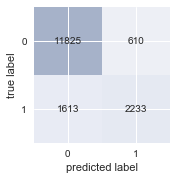

In [153]:
plot_confusion_matrix(confusion_matrix(y_test, revised_rf.predict(X_test_selected)))

print(classification_report(y_test, revised_rf.predict(X_test_selected)))

Our recall for the positive class actually worsens, but this is offset by the increases in recall for the negative class and in precision for the positive class, which lead to average metrics that are 1% higher than the prior model.

Area under the curve: 0.915917309793


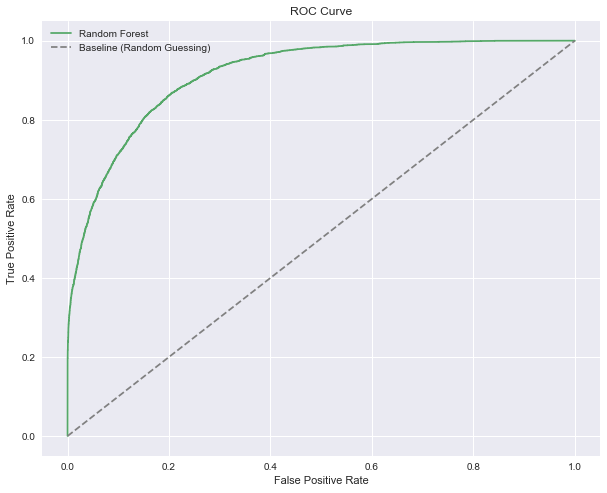

In [170]:
from sklearn.metrics import roc_auc_score, roc_curve

probabilities = revised_rf.predict_proba(X_test_selected)
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

print('Area under the curve:', roc_auc_score(y_test, probabilities[:,1]))

roc_fig, roc_ax = plt.subplots(figsize=(10,8))
roc_ax.plot(fpr, tpr, color='g', label='Random Forest')
roc_ax.plot([0,1],[0,1], color='gray', ls='--', label='Baseline (Random Guessing)')
roc_ax.set_xlabel('False Positive Rate')
roc_ax.set_ylabel('True Positive Rate')
roc_ax.set_title('ROC Curve')
roc_ax.legend();

With an area under the curve of 0.9159, our model is effective at discriminating between the two classes. Our model is likely to be very useful and will be able to be applied effectively to new data.